In [1]:
# Dependencies
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

2025-03-30 20:37:05.563022: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-30 20:37:05.563442: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-30 20:37:05.565839: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-30 20:37:05.572832: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743356225.584769   30178 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743356225.58

In [ ]:
# Load datasets
data = pd.read_csv('dataset/chars_train.csv')
data_test = pd.read_csv('dataset/chars_test.csv')

# Split X and y for train, validation and test dataset
X = data.iloc[:, 1:].values.astype('float32')
y = data['char'].astype(str)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X = X.reshape(-1, 28, 28, 1) / 255.0
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

X_test = data_test.iloc[:, 1:].values.astype('float32')
y_test = data_test['char'].astype(str)

y_test_encoded = label_encoder.transform(y_test)
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0


### Mongolian alphabet 
35 letters and 5 letters (й, ъ, ы, ь, щ) don't have uppercase. In training dataset, there are 65 different letters, 10 digits and 32 special characters

In [3]:
# Define CNN model
model = tf.keras.Sequential()

# First Convolutional Layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Second Convolutional Layer
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from previous layers
model.add(tf.keras.layers.Flatten())

# Fully Connected Layer with Dropout
model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.8))

# Output Layer
model.add(tf.keras.layers.Dense(units=len(label_encoder.classes_), activation='softmax'))


/home/bat/Documents/code/final_mn_ocr_dev/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-30 20:37:12.045934: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
# Train model and evaluate on validation dataset
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=40, batch_size=64)


Epoch 1/40
283/283 ━━━━━━━━━━━━━━━━━━━━ 29s 96ms/step - accuracy: 0.3851 - loss: 2.9084 - val_accuracy: 0.4596 - val_loss: 2.1067
Epoch 2/40
283/283 ━━━━━━━━━━━━━━━━━━━━ 27s 95ms/step - accuracy: 0.7995 - loss: 0.7196 - val_accuracy: 0.9491 - val_loss: 0.2076
Epoch 3/40
283/283 ━━━━━━━━━━━━━━━━━━━━ 27s 94ms/step - accuracy: 0.8558 - loss: 0.5394 - val_accuracy: 0.9591 - val_loss: 0.1800
Epoch 4/40
283/283 ━━━━━━━━━━━━━━━━━━━━ 26s 94ms/step - accuracy: 0.8912 - loss: 0.4111 - val_accuracy: 0.9593 - val_loss: 0.1821
Epoch 5/40
283/283 ━━━━━━━━━━━━━━━━━━━━ 26s 93ms/step - accuracy: 0.9033 - loss: 0.3590 - val_accuracy: 0.9668 - val_loss: 0.1449
Epoch 6/40
283/283 ━━━━━━━━━━━━━━━━━━━━ 26s 93ms/step - accuracy: 0.9191 - loss: 0.3057 - val_accuracy: 0.9662 - val_loss: 0.1527
Epoch 7/40
283/283 ━━━━━━━━━━━━━━━━━━━━ 26s 92ms/step - accuracy: 0.9285 - loss: 0.2724 - val_accuracy: 0.9637 - val_loss: 0.1646
Epoch 8/40
283/283 ━━━━━━━━━━━━━━━━━━━━ 26s 92ms/step - accuracy: 0.9365 - loss: 0.2334 - 

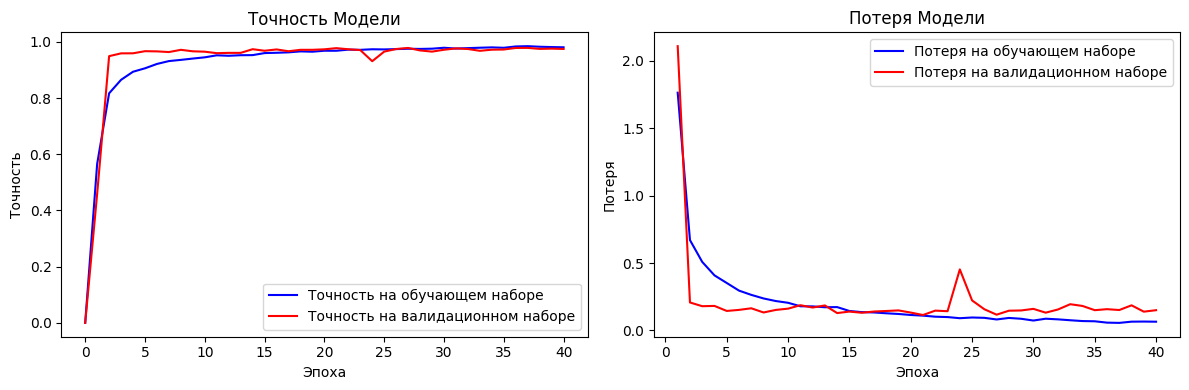

In [5]:
# Plot graph for training history
def plot_graph(epochs1, epochs2, acc, val_acc, loss, val_loss):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    axes[0].plot(epochs1, acc, 'b', label='Точность на обучающем наборе')
    axes[0].plot(epochs1, val_acc, 'r', label='Точность на валидационном наборе')
    axes[0].set_title('Точность Модели')
    axes[0].set_xlabel('Эпоха')
    axes[0].set_ylabel('Точность')
    axes[0].legend(loc='lower right')
    
    axes[1].plot(epochs2, loss, 'b', label='Потеря на обучающем наборе')
    axes[1].plot(epochs2, val_loss, 'r', label='Потеря на валидационном наборе')
    axes[1].set_title('Потеря Модели')
    axes[1].set_xlabel('Эпоха')
    axes[1].set_ylabel('Потеря')
    axes[1].legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()

epochs_acc = range(0, len(history.history['accuracy']) + 1)
epochs_loss = range(1, len(history.history['accuracy']) + 1)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
acc_update = [0] + acc
val_acc_update = [0] + val_acc
plot_graph(epochs_acc, epochs_loss, acc_update, val_acc_update, loss, val_loss)


In [6]:
# Evaluation on test dataset
score = model.evaluate(X_test, y_test_encoded, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.14171099662780762
Test accuracy: 0.9761103987693787


In [7]:
# Make prediction and create column named prediction
predictions = model.predict(X_test)
predicted_indices = np.argmax(predictions, axis=1)

y_test_decoded = label_encoder.inverse_transform(predicted_indices)
data_test['prediction'] = y_test_decoded

177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step


In [8]:
accuracy_by_char = pd.DataFrame({
    'total': data_test.groupby('char').size(),
    'correct': data_test[data_test['char'] == data_test['prediction']].groupby('char').size(),
    'accuracy': (data_test[data_test['char'] == data_test['prediction']]
                .groupby('char').size() / 
                data_test.groupby('char').size() * 100)
}).round(2)

accuracy_by_char = accuracy_by_char.sort_values('accuracy', ascending=False)

print("\nCharacters with accuracy less than 95%:")
print(accuracy_by_char[accuracy_by_char['accuracy'] < 95])


Characters with accuracy less than 95%:
      total  correct  accuracy
char                          
-       117      111     94.87
.       116      110     94.83
,       102       96     94.12
З       131      122     93.13
*        26       24     92.31
]        30       26     86.67
%        11        9     81.82


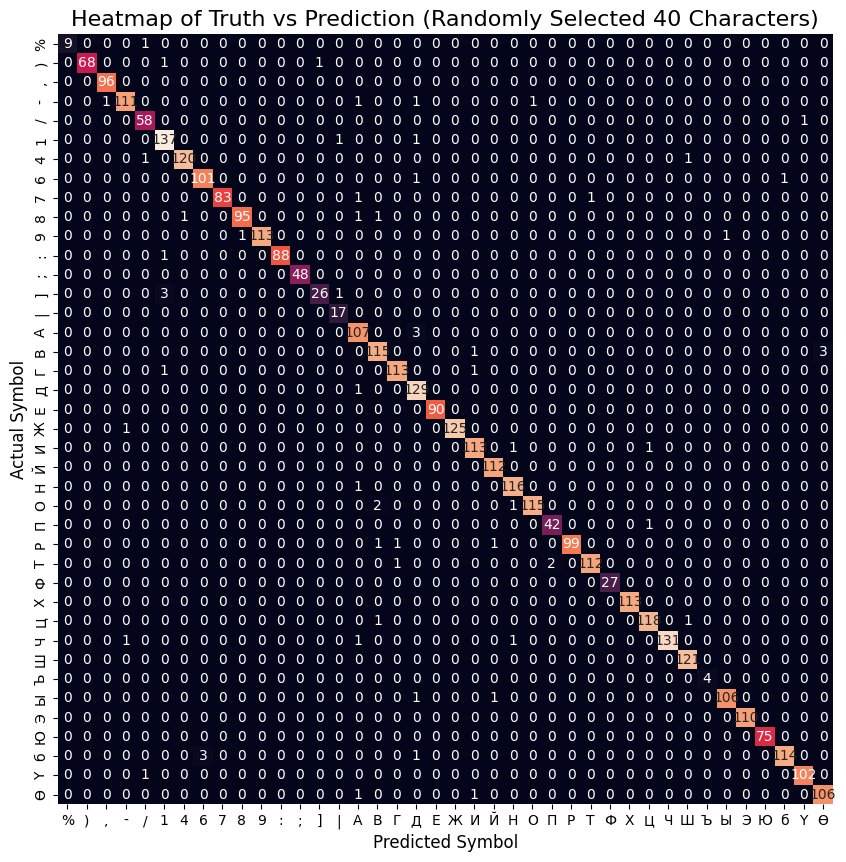

In [9]:
# Dataset consists of 107 unique characters, so randomly selected 30 of them and drew heatmap
unique_symbols = data_test['char'].unique()
selected_symbols = np.random.choice(unique_symbols, 40, replace=False)

filtered_data = data_test[data_test['char'].isin(selected_symbols)]

order = sorted(selected_symbols)

conf_matrix = pd.crosstab(filtered_data['char'], filtered_data['prediction'], rownames=['Actual'], colnames=['Predicted'], 
                          dropna=False)

conf_matrix = conf_matrix.reindex(index=order, columns=order, fill_value=0)

plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, annot_kws={'size': 10})
plt.title('Heatmap of Truth vs Prediction (Randomly Selected 40 Characters)', fontsize=16)
plt.xlabel('Predicted Symbol', fontsize=12)
plt.ylabel('Actual Symbol', fontsize=12)
plt.show()


In [10]:
# Evaluation by categories (letter, digit, symbol)
letter_str = 'АБбВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯӨҮ'
digits_str = "0123456789"
symbols_str = '.,-":)(/[];*|%'

data_letter = data_test[data_test['char'].isin(list(letter_str))]
data_digit = data_test[data_test['char'].isin(list(digits_str))]
data_symbol = data_test[data_test['char'].isin(list(symbols_str))]

def calculate_accuracy(data):
    correct_predictions = (data['char'] == data['prediction']).sum()
    total_predictions = len(data)
    accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
    return accuracy

accuracy_letter = calculate_accuracy(data_letter)
accuracy_digit = calculate_accuracy(data_digit)
accuracy_symbol = calculate_accuracy(data_symbol)

# Display results
print(f"Test accuracy for letters: {accuracy_letter:.2%}")
print(f"Test accuracy for digits: {accuracy_digit:.2%}")
print(f"Test accuracy for symbols: {accuracy_symbol:.2%}")


Test accuracy for letters: 97.89%
Test accuracy for digits: 97.85%
Test accuracy for symbols: 96.12%


In [ ]:
# Save the model and label encoder
model.save('model/recognition_model.h5')
np.save('model/encoder.npy', label_encoder.classes_)